Checking version of tensorflow and keras

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import layers
from tensorflow import keras

print(f"Tensorflow: {tf.__version__}\nKeras: {keras.__version__}")

Tensorflow: 2.16.1
Keras: 3.3.3


Use dataset of keras

In [19]:
(train_data,train_label),(test_data,test_label) = keras.datasets.fashion_mnist.load_data()


Set names for the labels

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Show data and label

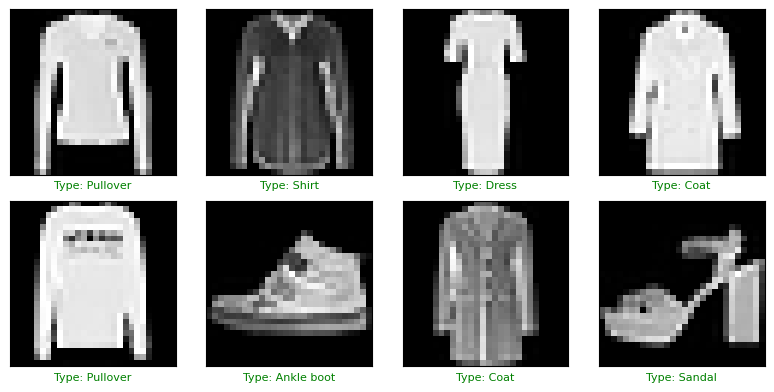

In [181]:
import random
from typing import Optional
def plot_data(train_data: np.ndarray, train_label: np.ndarray, test_proba: Optional[np.ndarray] = None) -> None:
    nrows, ncols = 2,4
    fig, axes = plt.subplots(nrows,ncols,figsize=(8,4))

    len_x = train_data.shape[0]

    for idx in range(nrows*ncols):
        ax = axes[idx // ncols, idx % ncols]

        img_idx = random.randint(0,len_x)
        
        ax.imshow(train_data[img_idx], cmap="gray")
        ax.set(xticks=[], yticks=[])
        color = "green"

        true_label_str = f"Type: {class_names[train_label[img_idx]]}"

        if test_proba is not None:
            predicted_idx = np.argmax(test_proba[img_idx])
            predicted_label = class_names[predicted_idx]
            color = 'red' if predicted_idx != train_label[img_idx] else color
            predicted_label_str = f"Predict: {predicted_label}"

        img_title = true_label_str if test_proba is None else true_label_str + "\n" + predicted_label_str
        ax.set_xlabel(img_title, color=color,fontsize=8)

    plt.tight_layout()
    plt.show()

plot_data(train_data,train_label)

Image Pre-processing
Reshaping it into the shape the model expects and scailing it so that all values are in the `[0,1]` interval
Transform from `unit8` to `float64`

In [22]:
train_data = train_data / 255.0
test_data = test_data / 255.0

Reshape data from 3 dimensions to 4 dimensions

In [23]:
train_data = np.expand_dims(train_data, axis=-1)
test_data = np.expand_dims(test_data, axis=-1)

In [24]:
train_data.shape,test_data.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Turn Labels into bool array
1 -> 0 1 0...
2 -> 0 0 1...

In [25]:
class_nums = len(class_names)
train_label_graph = keras.utils.to_categorical(train_label,class_nums)
test_label_graph = keras.utils.to_categorical(test_label,class_nums)

Build Model

In [26]:
input_shape = (28,28,1)

In [27]:

model = keras.models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(class_nums, activation='softmax')
])

model.summary()

/home/lamb/project/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Train model focus on accuracy

In [28]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
epochs = 10
batch_size = 256
history = model.fit(train_data,train_label_graph,
          epochs=epochs,
          batch_size=batch_size,
          validation_split=0.1)

Epoch 1/10


211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7532 - loss: 0.7163 - val_accuracy: 0.8593 - val_loss: 0.3926
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8648 - loss: 0.3800 - val_accuracy: 0.8657 - val_loss: 0.3620
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8787 - loss: 0.3317 - val_accuracy: 0.8608 - val_loss: 0.3627
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8846 - loss: 0.3137 - val_accuracy: 0.8728 - val_loss: 0.3477
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8965 - loss: 0.2798 - val_accuracy: 0.8718 - val_loss: 0.3555
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8997 - loss: 0.2723 - val_accuracy: 0.8847 - val_loss: 0.3315
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9090 - loss: 0.2474 - val_accuracy: 0.8817 - val_loss: 0.3286
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9120 - loss: 0.2369 - val_accuracy: 0.8858 - val_

In [30]:
history_dict = history.history

In [31]:
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [32]:
train_loss, val_loss = history_dict["loss"], history_dict["val_loss"]
train_acc, val_acc = history_dict["accuracy"], history_dict["val_accuracy"]

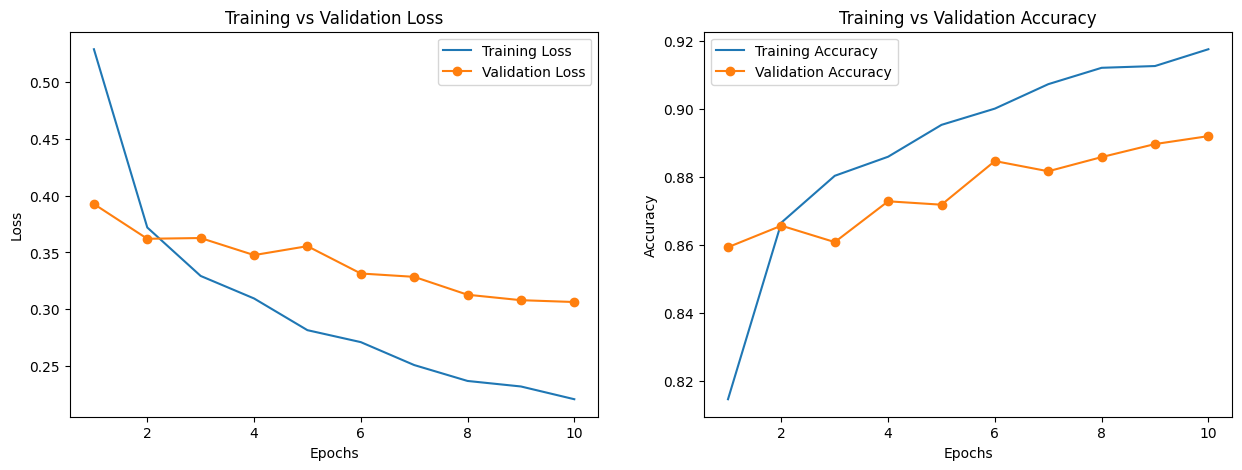

In [40]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,5))
epoch_runs = [i+1 for i in range(epochs)]

ax1.plot(epoch_runs, train_loss, label = "Training Loss")
ax1.plot(epoch_runs, val_loss, label = "Validation Loss", marker = 'o')
ax1.set(title='Training vs Validation Loss', xlabel='Epochs', ylabel='Loss')
ax1.legend()

ax2.plot(epoch_runs, train_acc, label = "Training Accuracy")
ax2.plot(epoch_runs, val_acc, label = "Validation Accuracy", marker = 'o')
ax2.set(title='Training vs Validation Accuracy', xlabel='Epochs', ylabel='Accuracy')
ax2.legend()

plt.show()

In [41]:
score = model.evaluate(test_data, test_label_graph)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.8878 - loss: 0.3281


In [43]:
print(f"Test Loss: {score[0]:.4f}")
print(f"Test Accuracy: {score[1]:.4f}")

Test Loss: 0.3244
Test Accuracy: 0.8884


In [46]:
test_sample = test_data[:3]
test_proba = model.predict(test_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [48]:
test_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.011, 0.   ,
        0.989],
       [0.   , 0.   , 0.999, 0.   , 0.001, 0.   , 0.001, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [49]:
predictions = np.argmax(test_proba, axis=1)

In [53]:
[class_names[pred] for pred in predictions]

['Ankle boot', 'Pullover', 'Trouser']

In [56]:
test_proba = model.predict(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


In [68]:
print(test_proba[0].round(3))

[0.    0.    0.    0.    0.    0.    0.    0.011 0.    0.989]


Showing test case

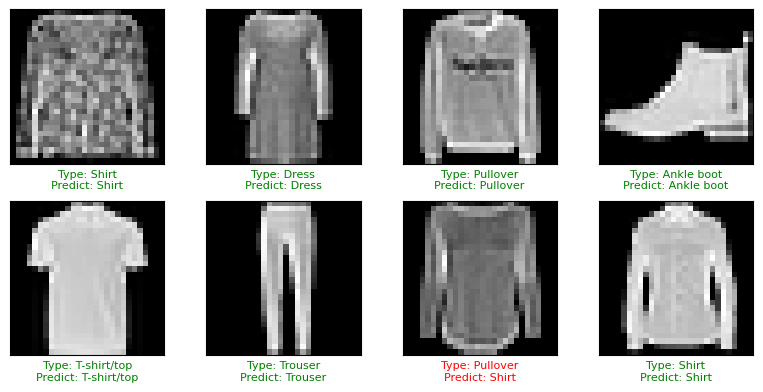

In [183]:
plot_data(test_data,test_label,test_proba)

In [174]:
def show_test(test_data, test_proba, test_label):
    predicted_label = np.argmax(test_proba)
    plt.figure(figsize=(20,10))

    plt.subplot(1,2,1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    if predicted_label != test_label:
        plt.xlabel(f"Test Label: {class_names[test_label]}\nPredicted: {class_names[predicted_label]}",
                       color="red",
                       fontsize=24)
    else:
        plt.xlabel(f"Predicted: {class_names[predicted_label]}",
                       color="green",
                       fontsize=24)

    plt.imshow(test_data)


    plt.subplot(1,2,2)
    thisplot = plt.bar(range(10), test_proba, color="#777777")
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    plt.ylim([0, 1])


    thisplot[predicted_label].set_color("red")
    thisplot[test_label].set_color("blue")

Showing test case randomly

Wrong Prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step


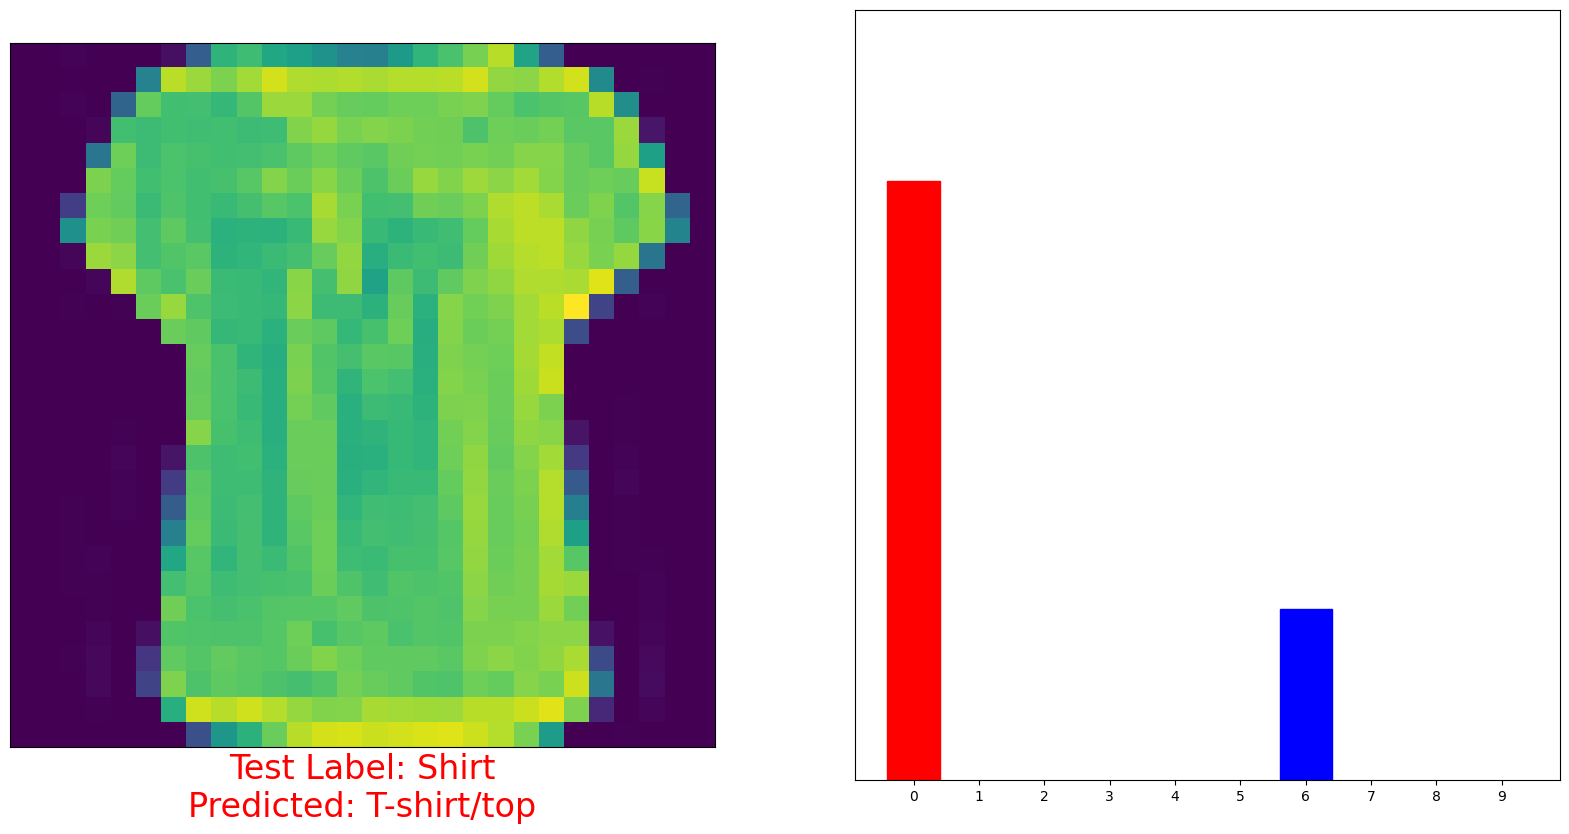

In [180]:
i = random.randint(0,len(test_label))

test_proba = model.predict(test_data)


show_test(test_data[i],test_proba[i],np.argmax(test_label_graph[i]))

Right Prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step


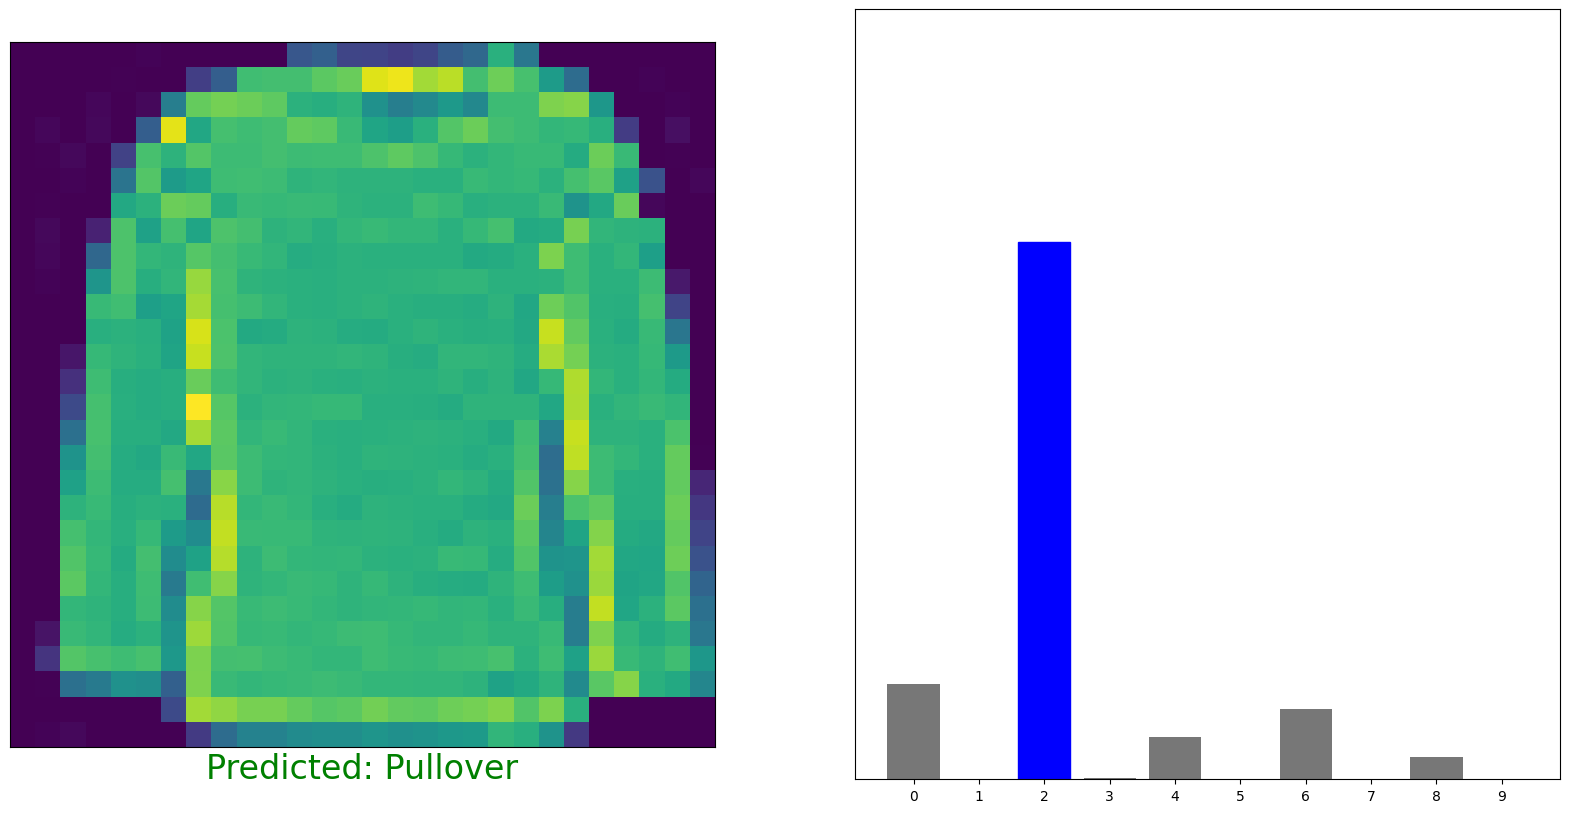

In [184]:
i = random.randint(0,len(test_label))

test_proba = model.predict(test_data)


show_test(test_data[i],test_proba[i],np.argmax(test_label_graph[i]))